## Plot pixel over classes

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.patches as mpatches

# plt.style.use(['science','grid', 'no-latex'])

In [2]:
plt.style.use(['science','grid', 'no-latex'])


classes = ['Aspen', 'Birch', 'Burnt forest', 'Deforestation', 
           'Fir', 'Grass', 'Larch', 'Pine', 'Pinus sibirica', 
           'Quarry', 'Silver fir', 'Soil', 'Swamp', 'Water body'] 
pixels = [3940, 3414, 278, 740, 953, 641, 1395, 
          2728, 374, 32*8, 1520, 1745, 397, 1174]
classes = {'Aspen':"Populus tremula", 
           'Birch':"Betula pendula", 
           'Burnt forest':"Burnt forest", 
           'Deforestation':'Deforestation', 
           "Spruce":"Picea abies", 
           'Grass':'Grass',
           "Larch":"Larix sibirica",
           "Pine":"Pinus sylvestris",
           "Pinus sibirica": "Pinus sibirica",
           'Quarry':'Quarry',
           "Silver fir": "Abies sibirica" ,
           'Soil':'Soil', 
           'Swamp':'Swamp', 
           'Water body':'Water body'}
classes_forest = {'Aspen':"Forest", 
           'Birch':"Forest", 
           'Burnt forest':"NonForest", 
           'Deforestation':'NonForest', 
           "Fir":"Forest", 
           'Grass':'NonForest',
           "Larch":"Forest",
           "Pine":"Forest",
           "Pinus sibirica": "Forest",
           'Quarry':'NonForest',
           "Silver fir": "Forest" ,
           'Soil':'NonForest', 
           'Swamp':'NonForest', 
           'Water body':'NonForest'}


In [3]:
df = pd.DataFrame(data=[list(classes.keys()), pixels]).T
df.columns = ['Classes', 'Pixels']
df.loc[:, 'IsForest'] = list(classes_forest.values())


mask = df['Classes']!='Pinus sibirica'
df = df.loc[mask]
df = df.sort_values('IsForest')

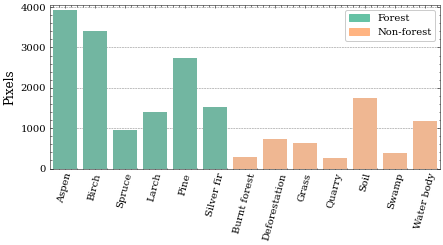

In [4]:
fig, ax1 = plt.subplots(1,1, figsize=(7,3))

col_forest = sns.color_palette("Set2")[0]
col_non_forest = sns.color_palette("pastel")[1]
g=sns.barplot(x='Classes',y='Pixels',data=df, 
              palette = 6*[col_forest]+ 
                          7*[col_non_forest],
              ax=ax1)

ax1.set_xlabel('', fontdict={'fontsize':12})
ax1.set_ylabel('Pixels', fontdict={'fontsize':12})
# ax1.grid(which='both')
ax1.set_axisbelow(True)
ax1.tick_params(axis='x', rotation=75)
ax1.set_ylim(0,np.max(df['Pixels'])+100)
ax1.legend(('y0','y1'))


forest = mpatches.Patch(color=col_forest, label='Forest')
non_forest = mpatches.Patch(color=col_non_forest, label='Non-forest')
ax1.legend(handles=[forest, non_forest])
plt.savefig('./plots/PixelDistrib.png', dpi=300, bbox_inches='tight')
plt.savefig('./plots/PixelDistrib.svg', bbox_inches='tight')
plt.show()

## 2. BarPlot metrics for separate trees 


In [5]:
classes = {'Aspen':"Populus \ntremula", 
           'Birch':"Betula \npendula", 
           'Burnt forest':"Burnt forest", 
           'Deforestation':'Deforestation', 
           "Fir":"Picea \nabies", 
           'Grass':'Grass',
           "Larch":"Larix \nsibirica",
           "Pine":"Pinus \nsylvestris",
           "Cedar": "Pinus \nsibirica",
           'Quarry':'Quarry',
           "Silver fir": "Abies \nsibirica" ,
           'Soil':'Soil', 
           'Swamp':'Swamp', 
           'Water body':'Water body'}

classes = {'Aspen':"Aspen", 
           'Birch':"Birch", 
           'Burnt forest':"Burnt forest", 
           'Deforestation':'Deforestation', 
           "Fir":"Spruce", 
           'Grass':'Grass',
           "Larch":"Larch",
           "Pine":"Pine",
           "Cedar": "Pinus \nsibirica",
           'Quarry':'Quarry',
           "Silver fir": "Silver fir" ,
           'Soil':'Soil', 
           'Swamp':'Swamp', 
           'Water body':'Water body'}


df = pd.read_excel('./metrics/BarPlot.xlsx')
df.loc[:, 'Tree'] =  df.loc[:, 'Tree'].apply(lambda x: classes[x])
mask = (df['Tree']!='Pinus \nsibirica') & (df['Model']!='DeepLab CNN')
df = df.loc[mask]


In [6]:
import itertools
import matplotlib

In [7]:
matplotlib.rcParams['hatch.linewidth'] = 0.1  # previous pdf hatch linewidth

In [8]:
plt.style.use(['science','grid', 'no-latex'])

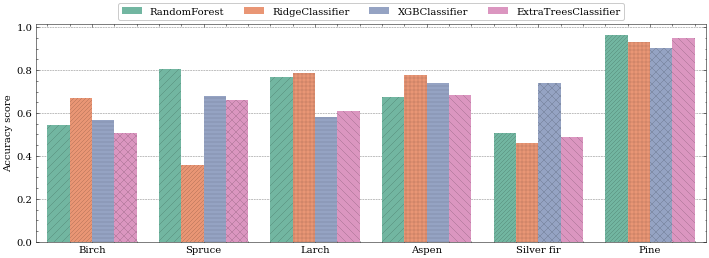

In [9]:
fig, ax1 = plt.subplots(1,1, figsize=(12,4))
sns.barplot(x = 'Tree', y='Score', hue='Model',
            data=df, ax=ax1, palette=sns.color_palette('Set2'))
ax1.set_xlabel('')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=5)
ax1.set_ylabel('Accuracy score')

num_locations = len(df.Model.unique())
hatches = itertools.cycle(['/', '//', '+', '-', 'x', '\\', '*', 'o', 'O', '.'])
for i, bar in enumerate(ax1.patches):
    if i % num_locations == 0:
        hatch = next(hatches)
    bar.set_hatch(3*hatch)
plt.savefig('./plots/MetricsForest.png', dpi=300, bbox_inches='tight')
plt.savefig('./plots/MetricsForest.svg', bbox_inches='tight')

plt.show()

## 3. Heatmap of accuracy metric for ML models 

In [10]:
df = pd.read_excel('./metrics/All_Features_AC.xlsx')
df = df.set_index('Unnamed: 0')
df.columns = ['Bands', 'Bands+\nTerrain', 'Bands+\nSI', 
              'Bands+\nTexture', 'All features']

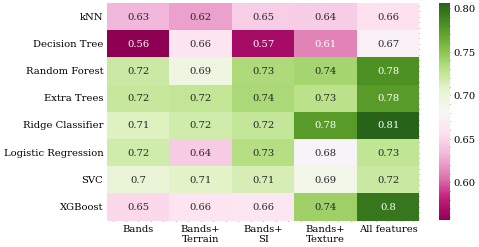

In [11]:
fig, ax1 = plt.subplots(1,1, figsize=(7,4))
sns.heatmap(df, ax=ax1,cmap='PiYG', annot=True)
ax1.set_ylabel('')
plt.savefig('./plots/Heatmap.png', dpi=300)
plt.savefig('./plots/Heatmap.svg')
plt.show()

## 4. Heatmap of macroF1 metric for ML models 

In [12]:
df = pd.read_excel('./metrics/All_features_F1.xlsx')
df = df.set_index('Unnamed: 0')
df.columns = ['Bands', 'Bands+\nTerrain', 'Bands+\nSI', 
              'Bands+\nTexture', 'All features']

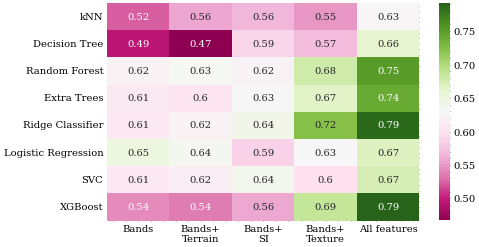

In [13]:
fig, ax1 = plt.subplots(1,1, figsize=(7,4))
sns.heatmap(df, ax=ax1,cmap='PiYG', annot=True)
ax1.set_ylabel('')
plt.savefig('./plots/Heatmap_F1.png', dpi=300)
plt.savefig('./plots/Heatmap_F1.svg')
plt.show()

## 5. Horizontal BarPlot - metrics for tree only


In [14]:
df = pd.read_excel('./metrics/All_features_Tree.xlsx')

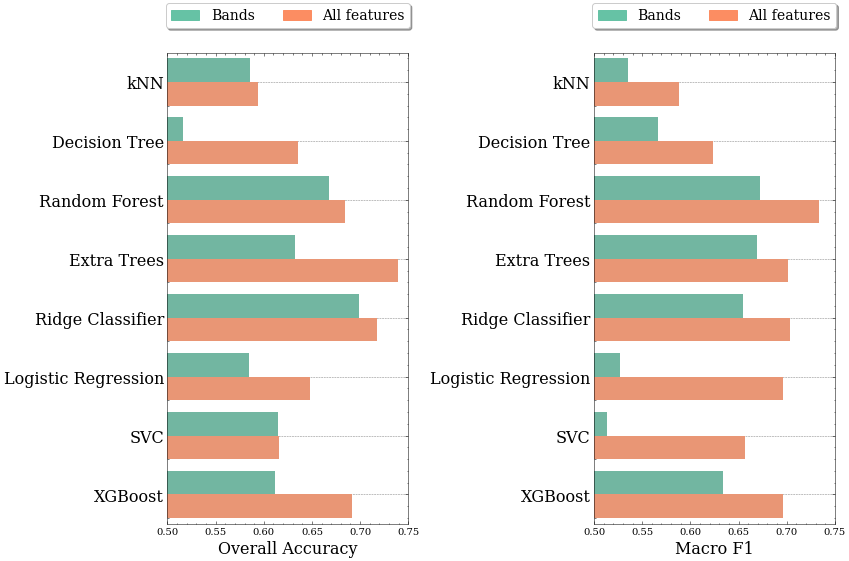

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, 
                               figsize=(12,8), tight_layout=True)

sns.barplot(x='Accuracy', y='classifier', hue='set', data=df, ax=ax1, palette=sns.color_palette('Set2'))
sns.barplot(x='macroF1', y='classifier', hue='set', data=df, ax=ax2, palette=sns.color_palette('Set2'))

ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=2)
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=2, shadow=True)
ax1.grid()
ax2.grid()
ax2.set_ylabel('')
ax1.set_ylabel('')
ax1.set_xlabel('Overall Accuracy', fontsize=16)
ax2.set_xlabel('Macro F1', fontsize=16)
ax1.set_ylabel('')

forest = mpatches.Patch(color=sns.color_palette('Set2')[0],
                        label='Bands')
non_forest = mpatches.Patch(color=sns.color_palette('Set2')[1],
                            label='All features')
ax1.legend(loc='upper center', 
           bbox_to_anchor=(0.5, 1.12),
           fontsize=14,  
           ncol=2,
           shadow=True,
           handles=[forest, non_forest])

ax2.legend(loc='upper center', 
           bbox_to_anchor=(0.5, 1.12),
           fontsize=14,  
           ncol=2,
           shadow=True,
           handles=[forest, non_forest])



ax1.set_yticklabels(list(df['classifier'])[:8], fontsize=16)
ax2.set_yticklabels(list(df['classifier'])[:8], fontsize=16)
ax1.set_xlim(0.5, 0.75)
ax2.set_xlim(0.5, 0.75)
plt.savefig('./plots/Acc_and_F1_tree.png', dpi=300, bbox_inches='tight')
plt.savefig('./plots/Acc_and_F1_tree.svg', bbox_inches='tight')
plt.show()

## 6.  BarPlots - Feature Importance

In [16]:
imp_name = ['Inverse difference moment', 
 'ASM', 
 'Energy', 
 'Contrast', 
 'Homogeneity', 
 'Sum average', 
 'Correlation', 
 'Difference entropy', 
 'Sum entropy', 
 'Dissimilarity', 
 'Sum variance', 
 'Difference variance', 
 'Sum of square variance'] 
 
imp_val = [0.0011309326264464647, 
 0.0017664127228166477, 
 0.0017441812696911026, 
 0.0212217164277032678, 
 0.0011592353565753027, 
 0.07429487508520462, 
 0.0011313936673481323, 
 0.0014724013616461864, 
 0.0137916205671953053, 
 0.0011593476719488273, 
 0.05633394981082561, 
 0.05354617754253772, 
 0.11941778621725954]


imp_channels_vals = [0.1271,0.0326,0.0444,0.0488,0.1257,0.0671,
                     0.0748,0.0132,0.0499,0.1877,0.1432,0.0855] 
imp_channels=["B01","B02","B03","B04","B05","B06","B07","B08","B8A","B09","B11","B12"]

In [18]:
df = pd.DataFrame(data=[imp_channels+imp_name, imp_channels_vals+imp_val]).T
df.columns = ['Features', 'MeanDecreaseGini']
# mask = df.MeanDecreaseGini > 0.01 # Emp threshold
# df = df.loc[mask].reset_index(drop=True)

bands = df.iloc[:12, :]

# mask = bands.MeanDecreaseGini > 0.05 # Emp threshold
# bands = bands.loc[mask].reset_index(drop=True)

texture = df.iloc[12:, :]

# mask = texture.MeanDecreaseGini > 0.01 # Emp threshold
# texture = texture.loc[mask].reset_index(drop=True)


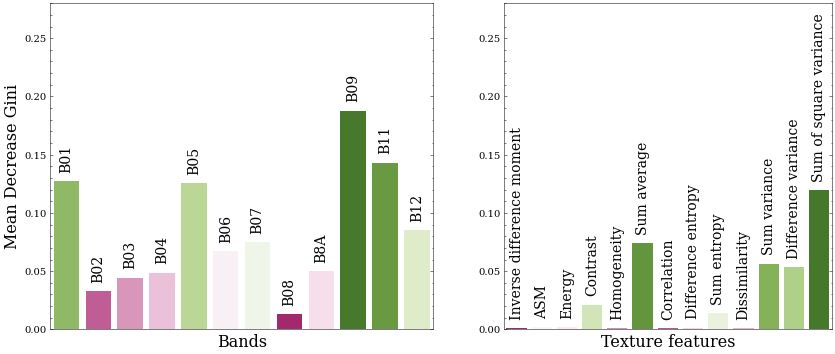

In [19]:

plt.style.use(['science','no-latex'])
fig, (ax1, ax2) = plt.subplots(1,2, 
                               figsize=(14,6),
                               gridspec_kw={'width_ratios': [7, 6]})



def getBarPlot(df, ax, cmap):

    rank = df["MeanDecreaseGini"].argsort().argsort() 
    pal = sns.color_palette(cmap, len(df))
    g=sns.barplot(x='Features',y='MeanDecreaseGini',data=df, palette=np.array(pal[::-1])[rank], ax=ax)
    df = df.reset_index(drop=True)
    for index, row in df.iterrows():
        g.text(row.name,row.MeanDecreaseGini+0.01, 
            row.Features,
            color='black',
            ha="center",
            fontsize=14,
            rotation=90)


    ax.set_xlabel('Features', fontdict={'fontsize':16})
    ax.set_ylabel('Mean Decrease Gini', fontdict={'fontsize':16})
    ax.grid()
    ax.set_axisbelow(True)
    ax.set_xticks([])
    ax.set_ylim(0,0.28)
    return ax

ax1 = getBarPlot(bands, ax1, 'PiYG_r')
ax2 = getBarPlot(texture, ax2, 'PiYG_r')
ax2.set_ylabel('')
ax1.set_xlabel('Bands', fontdict={'fontsize':16})
ax2.set_xlabel('Texture features', fontdict={'fontsize':16})
plt.savefig('./plots/FeatureImportance.png', dpi=300, bbox_inches='tight')
plt.savefig('./plots/FeatureImportance.svg', bbox_inches='tight')
plt.show()

## End